# Actividad - Regresión Lineal

* **Nombre: Victor Noel Madrid Castillo**
* **Matrícula: A01562528**

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio. <br>
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite. <br>
**Importante**:
  * Colocar nombres de ejes en gráficas.
  * Títulos en las gráficas.
  * Contestar cada pregunta.

Carga el conjunto de datos `presion.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [9]:
# Carga las librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression

In [5]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
df = pd.read_csv('presion.csv')
df.head(6)

Saving presion.csv to presion (2).csv
User uploaded file "presion.csv" with length 801 bytes


,Age,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406


El conjunto de datos contiene información demográfica sobre los asegurados en una compañía de seguros:
* **Age**: Edad de la persona.
* **Average of ap_hi**: Promedio de presión alta.
* **Average of ap_lo**: Promedio de presión baja.

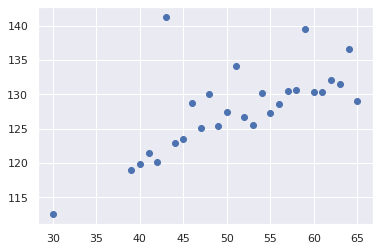

In [8]:
# Grafica la información de la edad y presión alta
x = df['Age'].values
y = df['Average of ap_hi'].values
plt.scatter(x, y);

Genera una regresión líneal para obtener una aproximación de la ecuación 
$$ y = ax + b $$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**, tanto para presión alta como la presión baja.

In [25]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?
x = df['Age'].values
y = df['Average of ap_hi'].values

modela = LinearRegression(fit_intercept=True)
modela.fit(x[:, np.newaxis], df['Average of ap_hi'].values)
print("Model slope:    ", modela.coef_[0])
print("Model intercept:", modela.intercept_)

Model slope:     0.47769702977669154
Model intercept: 103.3969740964366


In [26]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión baja?
x = df['Age'].values
y = df['Average of ap_lo'].values

modelb = LinearRegression(fit_intercept=True)
modelb.fit(x[:, np.newaxis], df['Average of ap_lo'].values)
print("Model slope:    ", modelb.coef_[0])
print("Model intercept:", modelb.intercept_)

Model slope:     0.6089810580238237
Model intercept: 63.726200409422745


Gráfica los datos reales contra los obtenidos con el modelo. Se debe visualizar los datos reales (azúl), recta del modelo (negro)y distancias entre ambos. (verde) 

Model slope:     0.47769702977669154
Model intercept: 103.3969740964366


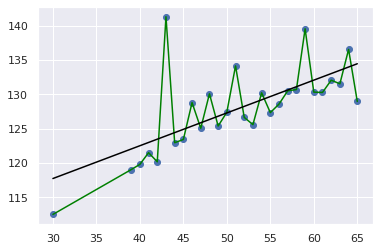

In [27]:
# Presión alta
x = df['Age'].values
y = df['Average of ap_hi'].values
plt.plot(x,y, color='green', )
plt.scatter(x, y);

modela = LinearRegression(fit_intercept=True)
modela.fit(x[:, np.newaxis], df['Average of ap_hi'].values)

yfit = modela.predict(x[:, np.newaxis])
plt.plot(x, yfit, color='black')

print("Model slope:    ", modela.coef_[0])
print("Model intercept:", modela.intercept_)

Model slope:     0.6089810580238237
Model intercept: 63.726200409422745


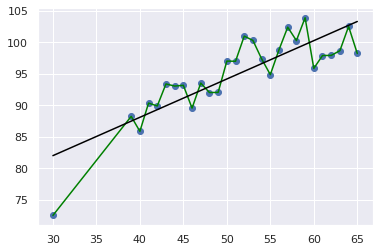

In [28]:
# Presión baja
x = df['Age'].values
y = df['Average of ap_lo'].values
plt.plot(x,y, color='green', )
plt.scatter(x, y);

modelb = LinearRegression(fit_intercept=True)
modelb.fit(x[:, np.newaxis], df['Average of ap_lo'].values)

yfit = modelb.predict(x[:, np.newaxis])
plt.plot(x, yfit, color='black')

print("Model slope:    ", modelb.coef_[0])
print("Model intercept:", modelb.intercept_)

¿Cual es la presión arterial atal y baja para una persona de cierta edad? Genera dos funciones que calculen los anterior.

In [29]:
def pressure_high(age):
  
  return modela.predict([[age]])

query_age= 76
pressure_high(query_age)

array([139.70194836])

In [30]:
def pressure_low(age):
  return modelb.predict([[age]])

query_age= 76
pressure_low(query_age)

array([110.00876082])